In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

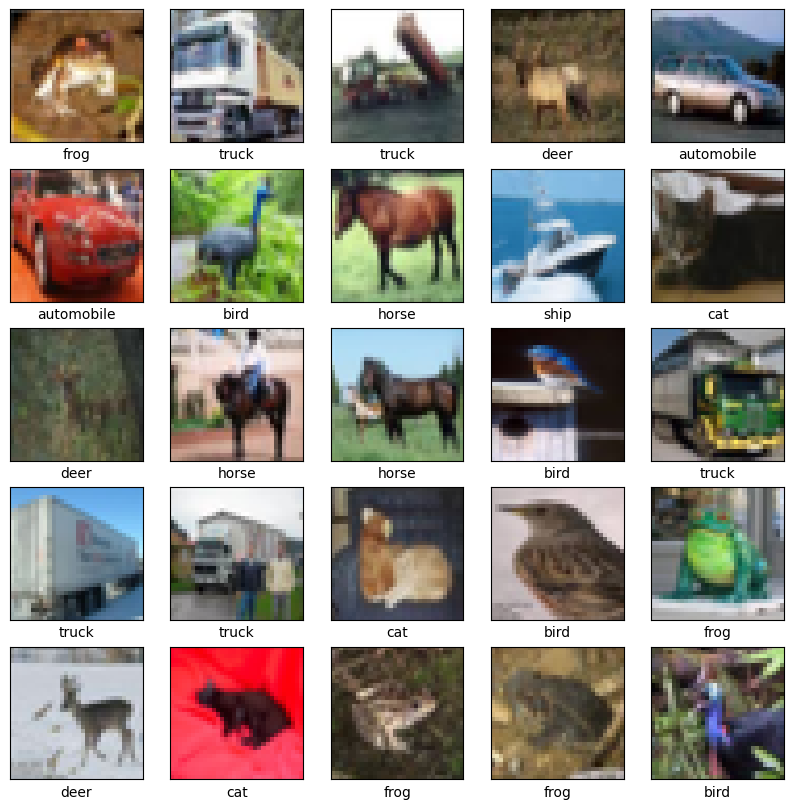

In [7]:
def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

# Use train_images and train_labels here
plot_sample_images(train_images, train_labels, class_names)

In [8]:
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer (10 classes for CIFAR-10)
model.add(layers.Dense(10))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [10]:
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3458 - loss: 1.7557 - val_accuracy: 0.5626 - val_loss: 1.2302
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5706 - loss: 1.2058 - val_accuracy: 0.6099 - val_loss: 1.1058
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6337 - loss: 1.0388 - val_accuracy: 0.6223 - val_loss: 1.0683
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6695 - loss: 0.9440 - val_accuracy: 0.6659 - val_loss: 0.9508
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6936 - loss: 0.8733 - val_accuracy: 0.6633 - val_loss: 0.9734
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7221 - loss: 0.7995 - val_accuracy: 0.6933 - val_loss: 0.8947
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7383 - loss: 0.7518 - val_accuracy: 0.6958 - val_loss: 0.8850
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7544 - loss: 0.7061

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - 2ms/step - accuracy: 0.6852 - loss: 2.4513

Test accuracy: 0.6851999759674072


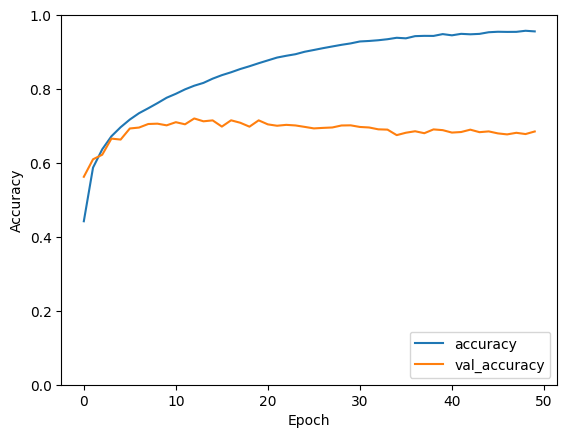

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [15]:

model.save('my_model.keras')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


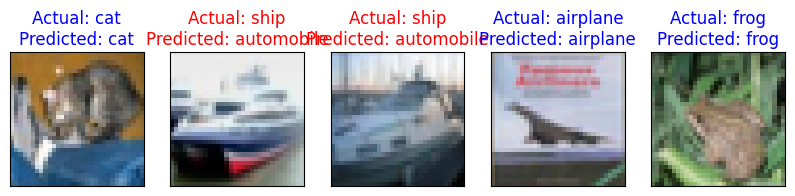

In [23]:
import numpy as np

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get predictions from the model
predictions = model.predict(test_images)

# Plot a few test images with their actual and predicted labels
def plot_images(num_images=5):
    plt.figure(figsize=(10, 32))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[i], cmap=plt.cm.binary)

        # Get the predicted label
        predicted_label = np.argmax(predictions[i])
        true_label = test_labels[i][0]

        # Set the title for each subplot
        color = 'blue' if predicted_label == true_label else 'red'
        plt.title(f"Actual: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}", color=color)

    plt.show()
# Call the function to plot images
plot_images(num_images=5)
